# Project 6 - Basic autoencoder for dimensionality reduction.

In this example, we'll use the MNIST dataset of handwritten digits and build a basic autoencoder for dimensionality reduction.

2023-10-04 00:03:29.582965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-10-04 00:03:33.957077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-04 00:03:33.957650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-10-04 00:03:35.909603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2765

2023-10-04 00:03:43.885171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 9s 27ms/step - loss: 0.2765 - val_loss: 0.1911
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1716 - val_loss: 0.1540
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1449 - val_loss: 0.1344
Epoch 4/50
235/235 [==============================] - 7s 27ms/step - loss: 0.1291 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1183 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1109 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1057 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1020 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 7s 30ms/step - loss: 0.0973 - val_loss: 0.0953


2023-10-04 00:08:35.202429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


2023-10-04 00:08:36.448692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


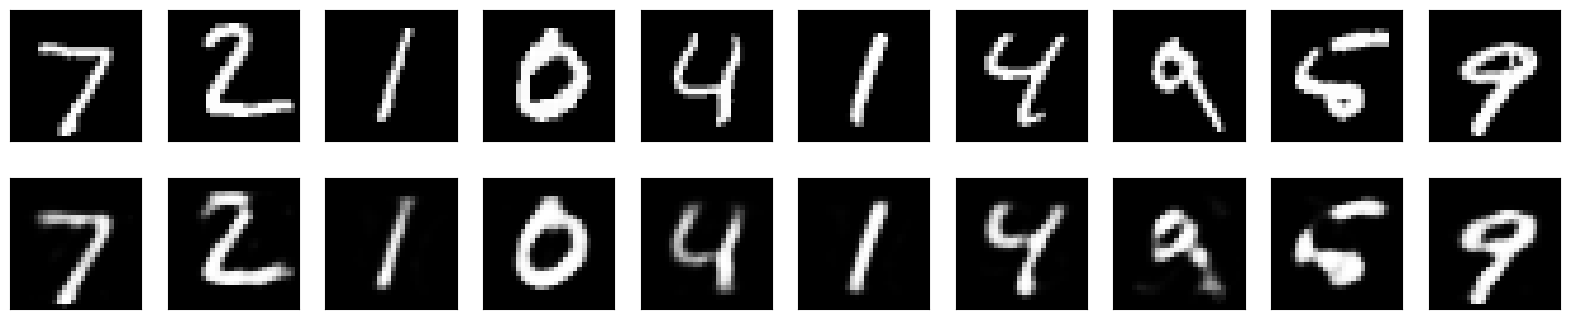

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_size = 784  # 28x28 pixels flattened
encoding_dim = 32  # Dimensionality of the encoded representation

input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test)

# Plot some examples
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In this code, we use the MNIST dataset and implement a simple autoencoder. The autoencoder learns to compress the 28x28 pixel images to a lower-dimensional representation (encoding) and then reconstructs the original images. We visualize the original and reconstructed images to observe how well the autoencoder learned the representations.

Epoch 1/50


2023-10-08 23:04:04.049763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2768

2023-10-08 23:04:11.775209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 9s 32ms/step - loss: 0.2768 - val_loss: 0.1902
Epoch 2/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1718 - val_loss: 0.1550
Epoch 3/50
235/235 [==============================] - 7s 31ms/step - loss: 0.1448 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1277 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1174 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1100 - val_loss: 0.1056
Epoch 7/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1046 - val_loss: 0.1012
Epoch 8/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1009 - val_loss: 0.0982
Epoch 9/50
235/235 [==============================] - 7s 31ms/step - loss: 0.0984 - val_loss: 0.0963
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0968 - val_loss: 0.0950


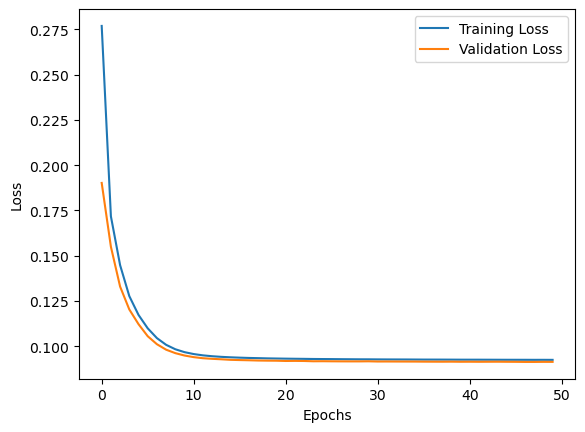

In [4]:
# With history and analysis
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_size = 784  # 28x28 pixels flattened
encoding_dim = 32  # Dimensionality of the encoded representation

input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
